In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation = 'relu', padding = 'same', input_shape=(28,28,1)))

In [3]:
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

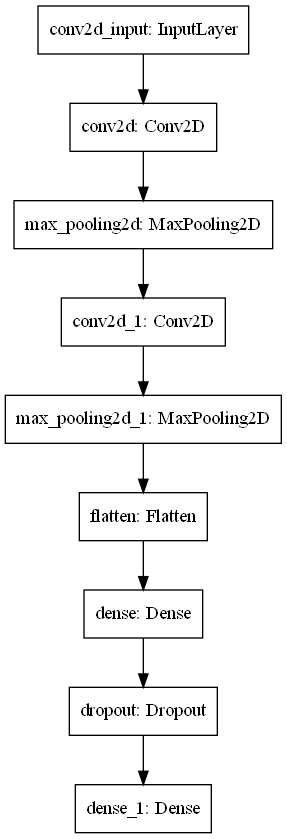

In [7]:
keras.utils.plot_model(model)

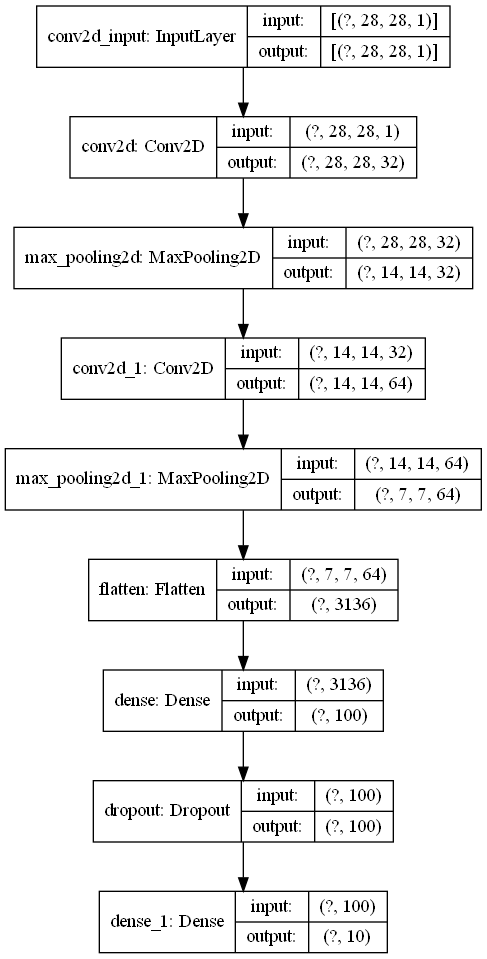

In [8]:
keras.utils.plot_model(model, show_shapes = True)

In [10]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target),callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5081 - accuracy: 0.8166 - val_loss: 0.3354 - val_accuracy: 0.8776
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3342 - accuracy: 0.8804 - val_loss: 0.2675 - val_accuracy: 0.9015
Epoch 3/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2839 - accuracy: 0.8967 - val_loss: 0.2500 - val_accuracy: 0.9086
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2529 - accuracy: 0.9082 - val_loss: 0.2325 - val_accuracy: 0.9131
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2296 - accuracy: 0.9164 - val_loss: 0.2308 - val_accuracy: 0.9135
Epoch 6/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2082 - accuracy: 0.9226 - val_loss: 0.2250 - val_accuracy: 0.9198
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1902 - accuracy: 0.9296 - val_loss: 0.2171 - val_accuracy:

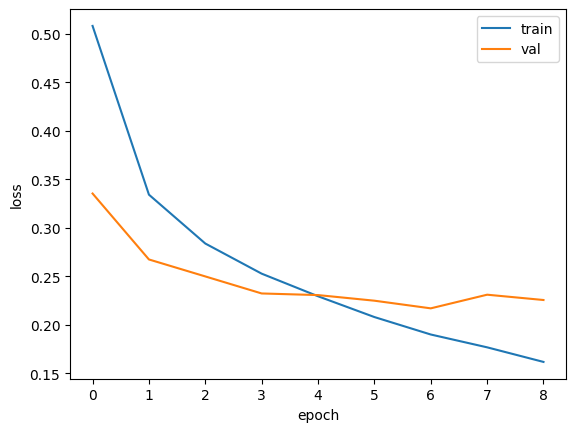

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [12]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2171 - accuracy: 0.9191


[0.21711893379688263, 0.9190833568572998]

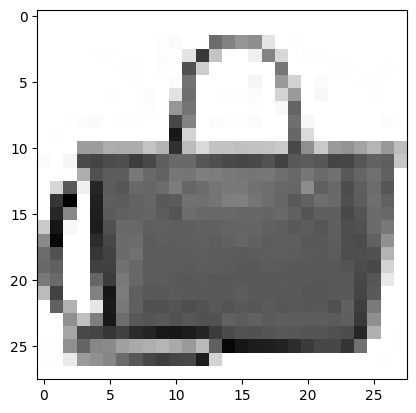

In [13]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [14]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[1.2512976e-17 3.4716867e-22 1.7601323e-20 3.7179450e-23 1.6797879e-18
  3.3574223e-16 2.1299411e-18 1.4779323e-15 1.0000000e+00 9.9339905e-17]]


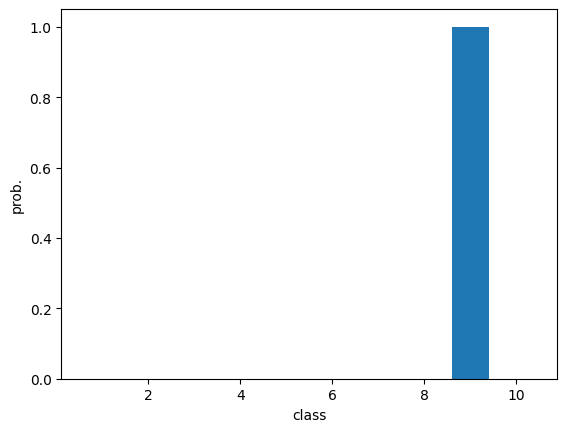

In [15]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [16]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [17]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [18]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [19]:
model.evaluate(test_scaled, test_target)


313/313 [==============================] - 1s 3ms/step - loss: 0.2372 - accuracy: 0.9177


[0.23720777034759521, 0.9176999926567078]